# Study the impact of recessions on unemployment rates

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
recession_periods = {
    'Start': ['2001-03-01', '2007-12-01', '2020-02-01'],
    'End': ['2001-11-01', '2009-06-01', '2020-05-01']}

In [3]:
recession_data = pd.DataFrame(recession_periods)
recession_data['Start'] = pd.to_datetime(recession_data['Start'])
recession_data['End'] = pd.to_datetime(recession_data['End'])


In [4]:
data = {
    'Date': pd.date_range(start='2000-01-01', periods=216, freq='ME'),
    'UnemploymentRate': [
        4.0, 4.1, 4.2, 4.3, 4.2, 4.1, 4.0, 3.9, 3.8, 3.7, 3.8, 3.9,  # 2000
        4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1,  # 2001
        5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3,  # 2002
        6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5,  # 2003
        7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,  # 2004
        8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9,  # 2005
        10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1,  # 2006
        11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3,  # 2007
        12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5,  # 2008
        13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7,  # 2009
        14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9,  # 2010
        16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1,  # 2011
        17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18.1, 18.2, 18.3,  # 2012
        18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19.0, 19.1, 19.2, 19.3, 19.4, 19.5,  # 2013
        19.6, 19.7, 19.8, 19.9, 20.0, 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7,  # 2014
        20.8, 20.9, 21.0, 21.1, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9,  # 2015
        22.0, 22.1, 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23.0, 23.1,  # 2016
        23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3   # 2017
    ]
}


In [5]:
unemployment_data = pd.DataFrame(data)
unemployment_data.set_index('Date', inplace=True)


# Plotting unemployment rates

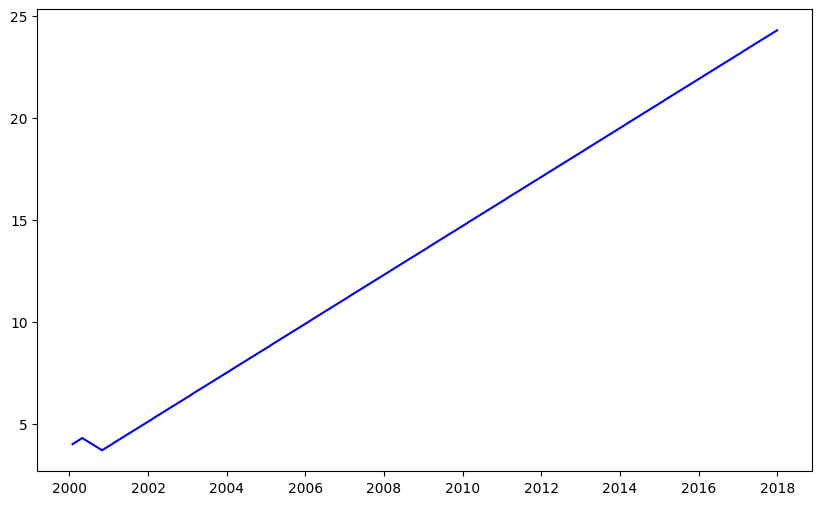

In [27]:
    plt.figure(figsize=(10, 6))
plt.plot(unemployment_data.index, unemployment_data['UnemploymentRate'], label='Unemployment Rate', color='blue')

plt.show()

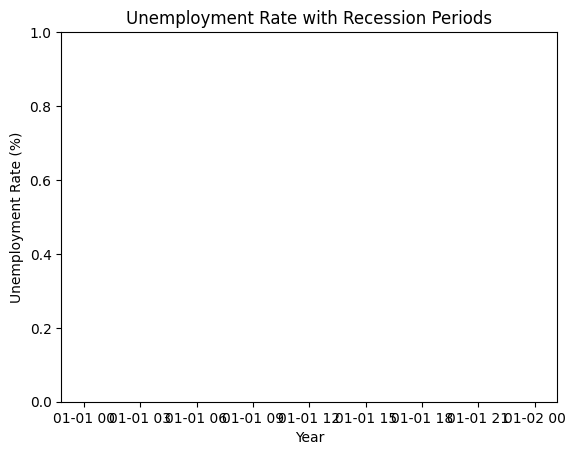

In [15]:
for _, row in recession_data.iterrows():
    plt.axvspan(row['Start'], row['End'], color='red', alpha=0.3)
    plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate with Recession Periods')
plt.show()



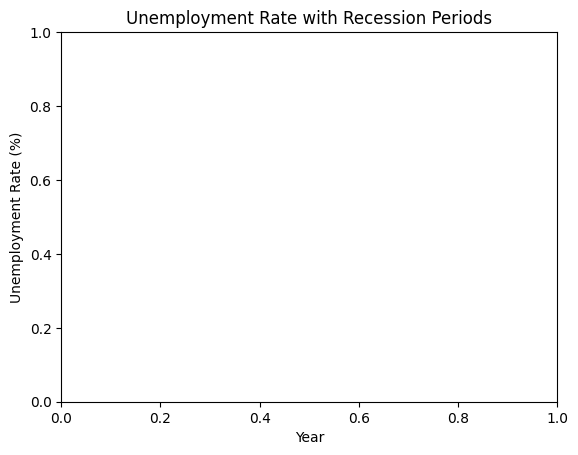

In [14]:
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate with Recession Periods')
plt.show()


# Analyze changes in unemployment rates during recession periods

In [21]:
def calculate_changes(df, recession_periods):
    changes = []
    for _, row in recession_periods.iterrows():
        start, end = row['Start'], row['End']
        pre_recession = df.loc[start - pd.DateOffset(months=6):start].mean()
        during_recession = df.loc[start:end].mean()
        post_recession = df.loc[end:end + pd.DateOffset(months=6)].mean()
        
        changes.append({
            'Start': start,
            'End': end,
            'Pre-Recession': pre_recession['UnemploymentRate'],
            'During Recession': during_recession['UnemploymentRate'],
            'Post-Recession': post_recession['UnemploymentRate']
        })
    
    return pd.DataFrame(changes)


changes = calculate_changes(unemployment_data, recession_data)
print(changes)


       Start        End  Pre-Recession  During Recession  Post-Recession
0 2001-03-01 2001-11-01       3.883333              4.55            5.25
1 2007-12-01 2009-06-01      11.950000             13.15           14.35
2 2020-02-01 2020-05-01            NaN               NaN             NaN


# Visualizing the comparison

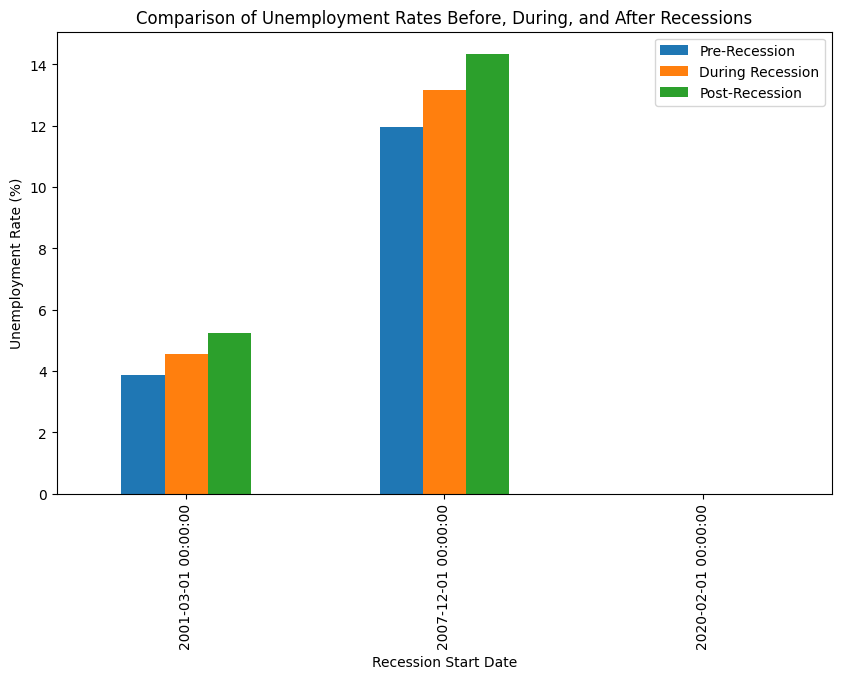

In [22]:
changes.set_index('Start', inplace=True)
changes[['Pre-Recession', 'During Recession', 'Post-Recession']].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Recession Start Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Comparison of Unemployment Rates Before, During, and After Recessions')
plt.show()